In [1]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

# Plot base image

In [2]:
def plot_image(img_path):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(plt.imread(img_path))
    ax.axis('off')
    plt.show()
    
sample = '../input/textocr-test/liver.jpg'

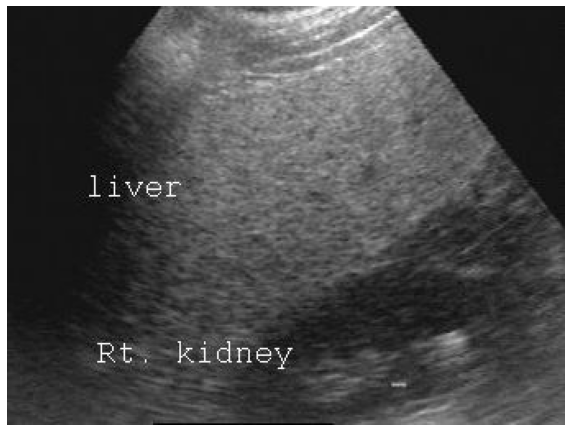

In [3]:
plot_image(sample)

## Method 1: EasyOCR on base example

In [4]:
import easyocr

reader_base = easyocr.Reader(['en'], gpu = True)

In [5]:
img_filename = sample

results_base_easy = reader_base.readtext(img_filename, detail=1)
results_base_easy

[([[45, 99], [109, 99], [109, 119], [45, 119]], 'liver', 0.973162798281514),
 ([[51, 201], [81, 201], [81, 221], [51, 221]], 'Rt', 0.9999919078146757),
 ([[98, 199], [178, 199], [178, 224], [98, 224]],
  'kidney',
  0.9999081644446406)]

In [6]:
base_easy_df = pd.DataFrame(results_base_easy, columns=['bbox','text','conf'])
base_easy_df = base_easy_df[['text','bbox','conf']]
base_easy_df

,text,bbox,conf
0,liver,"[[45, 99], [109, 99], [109, 119], [45, 119]]",0.973163
1,Rt,"[[51, 201], [81, 201], [81, 221], [51, 221]]",0.999992
2,kidney,"[[98, 199], [178, 199], [178, 224], [98, 224]]",0.999908


## Method 2: Keras-OCR on base example

In [7]:
!pip install keras-ocr -q
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [8]:
results_base_keras = pipeline.recognize([img_filename])
results_base_keras

[[('liver',
   array([[ 48.08535 , 102.81806 ],
          [108.243965, 104.045784],
          [107.93505 , 119.182335],
          [ 47.776436, 117.95461 ]], dtype=float32)),
  ('kidney',
   array([[102.2783 , 203.34158],
          [177.73514, 207.05258],
          [176.87778, 224.48581],
          [101.42094, 220.77481]], dtype=float32)),
  ('rt',
   array([[ 54., 206.],
          [ 79., 206.],
          [ 79., 221.],
          [ 54., 221.]], dtype=float32))]]

In [9]:
base_keras_df = pd.DataFrame(results_base_keras[0], columns=['text', 'bbox'])
base_keras_df

,text,bbox
0,liver,"[[48.08535, 102.81806], [108.243965, 104.04578..."
1,kidney,"[[102.2783, 203.34158], [177.73514, 207.05258]..."
2,rt,"[[54.0, 206.0], [79.0, 206.0], [79.0, 221.0], ..."


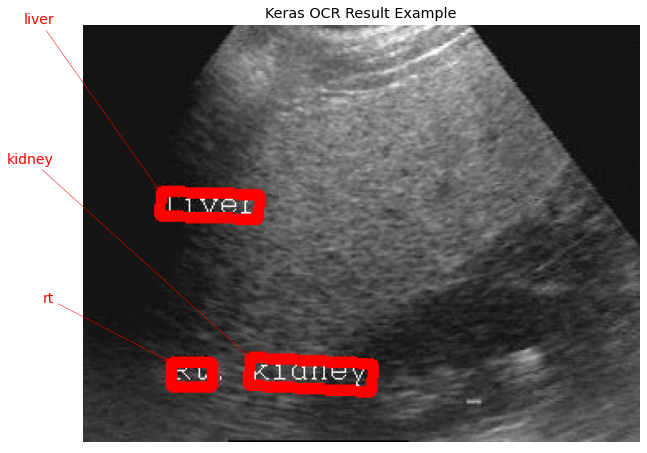

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img_filename), results_base_keras[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

## Carotid US example

### EasyOCR

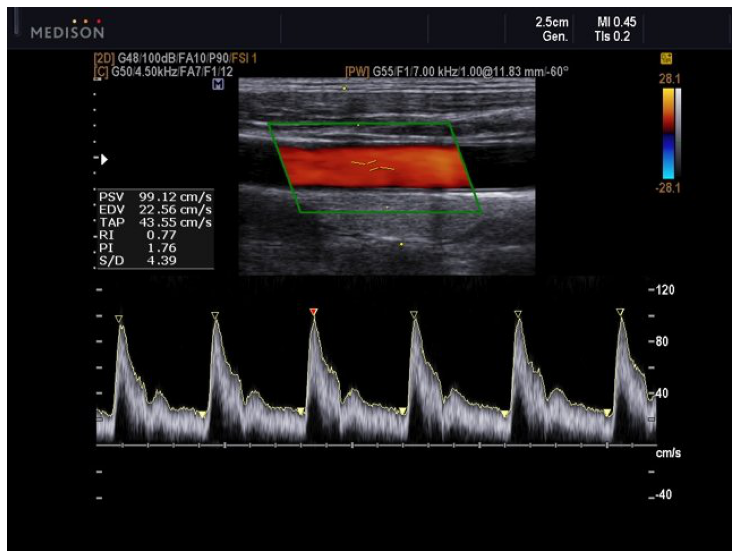

In [11]:
reader = easyocr.Reader(['en'], gpu = True)

img_filename = '../input/textocr-test/test1.jpg'

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(plt.imread(img_filename))
ax.axis('off')
plt.show()

In [12]:
results_easyocr = reader.readtext(img_filename)
easy_df = pd.DataFrame(results_easyocr, columns=['bbox','text','conf'])
easy_df

,bbox,text,conf
0,"[[465, 7], [499, 7], [499, 21], [465, 21]]",2Scm,0.726498
1,"[[519, 7], [559, 7], [559, 21], [519, 21]]",Mi0.45,0.538347
2,"[[17, 11], [89, 11], [89, 31], [17, 31]]",MEDISON,0.999968
3,"[[471, 19], [499, 19], [499, 33], [471, 33]]",Gen,0.596426
4,"[[517, 19], [553, 19], [553, 33], [517, 33]]",Tls 0.2,0.733204
5,"[[117, 37], [225, 37], [225, 53], [117, 53]]",'0OdB FAIO P9o FSI I,0.155342
6,"[[72, 36], [120, 36], [120, 68], [72, 68]]",Eogsoa,0.092472
7,"[[91, 49], [203, 49], [203, 65], [91, 65]]",G50 4 S0kHz FAT F1N2,0.175791
8,"[[297, 49], [499, 49], [499, 65], [297, 65]]","[PW G55F1ZOO kHz 1.00@11.83 mm-60""",0.271333
9,"[[573, 57], [597, 57], [597, 71], [573, 71]]","28,1",0.690662


### Keras-OCR

In [13]:
!pip install keras-ocr -q
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [14]:
results_kerasocr = pipeline.recognize([img_filename])
keras_df = pd.DataFrame(results_kerasocr[0], columns=['text', 'bbox'])
keras_df

,text,bbox
0,256m,"[[465.0, 7.0], [497.0, 7.0], [497.0, 18.0], [4..."
1,mio45,"[[520.0, 7.0], [557.0, 7.0], [557.0, 18.0], [5..."
2,medison,"[[20.046234, 15.27197], [88.17921, 16.426767],..."
3,gen,"[[472.0, 20.0], [496.0, 20.0], [496.0, 31.0], ..."
4,tls,"[[518.0, 20.0], [536.0, 20.0], [536.0, 31.0], ..."
5,02,"[[534.0, 20.0], [552.0, 20.0], [552.0, 32.0], ..."
6,2di,"[[77.0, 39.0], [97.0, 39.0], [97.0, 51.0], [77..."
7,gasnoodbfaiopin,"[[97.0, 39.0], [199.0, 39.0], [199.0, 51.0], [..."
8,fsi,"[[196.0, 39.0], [216.0, 39.0], [216.0, 51.0], ..."
9,0,"[[213.0, 39.0], [222.0, 39.0], [222.0, 50.0], ..."


In [15]:
easy_df.shape, keras_df.shape

((21, 3), (48, 2))

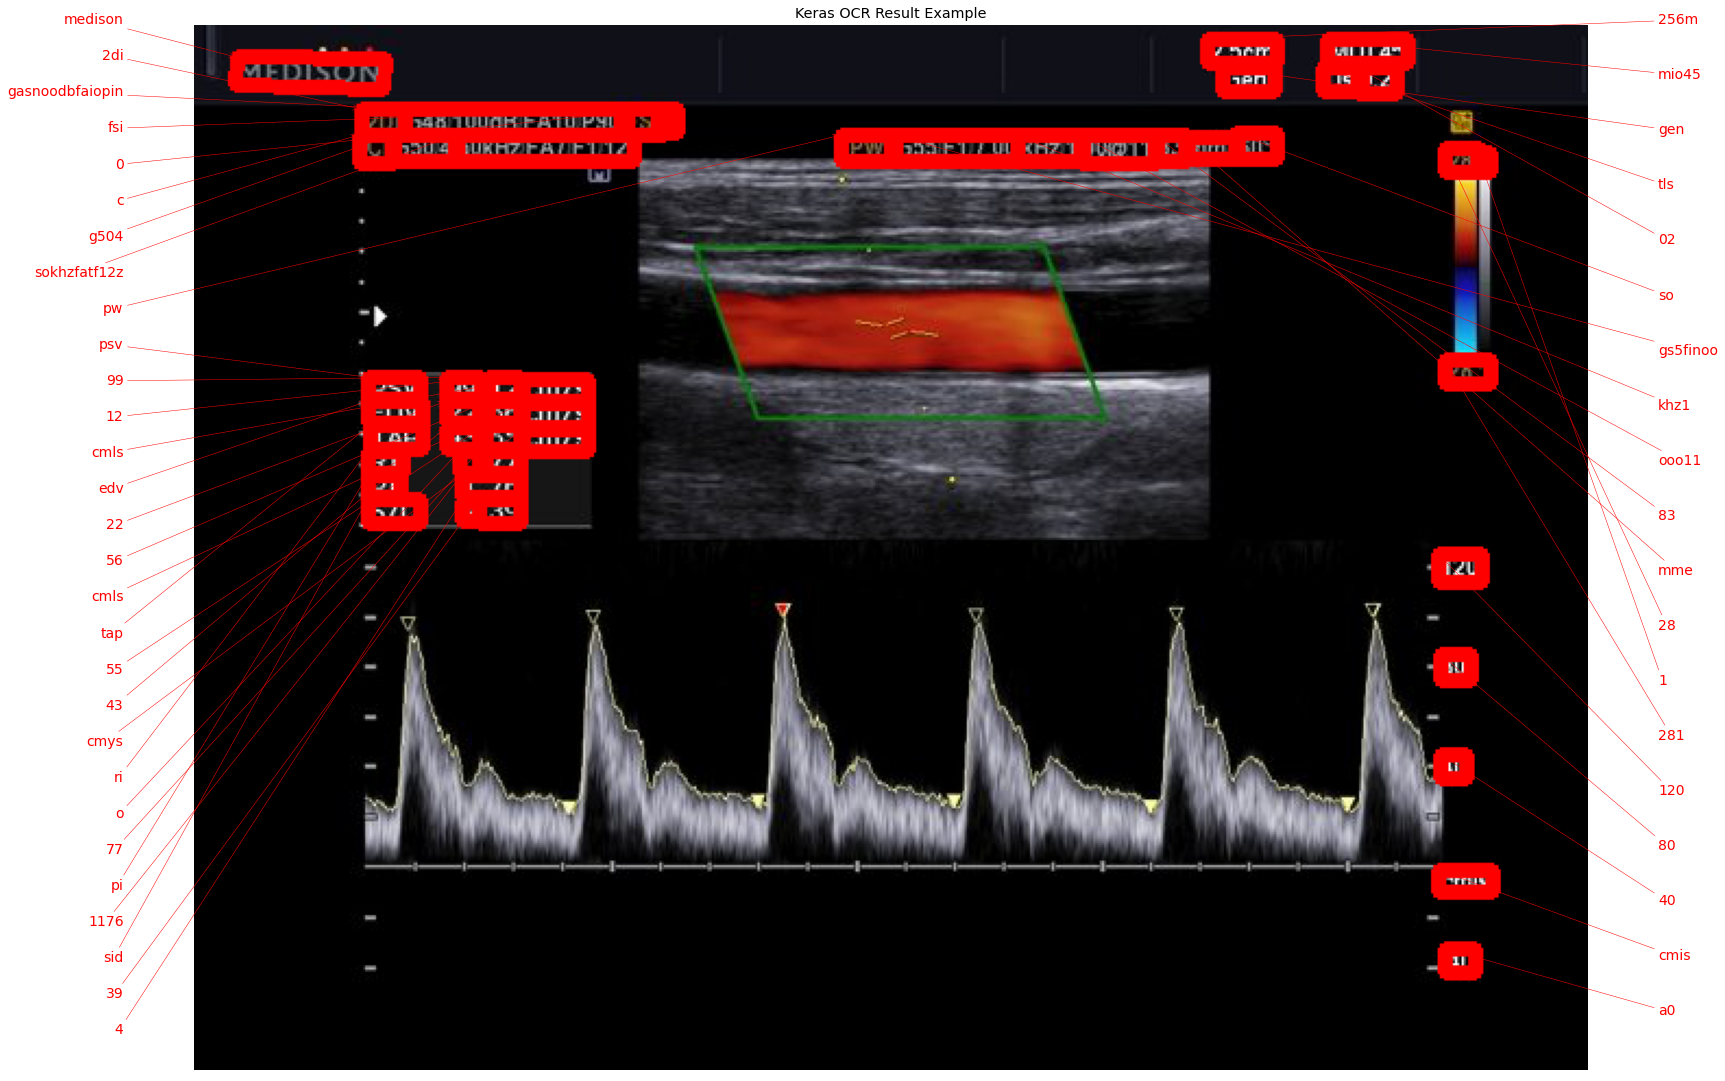

In [16]:
fig, ax = plt.subplots(figsize=(25, 30))
keras_ocr.tools.drawAnnotations(plt.imread(img_filename), results_kerasocr[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

### Comparing results

In [17]:
# path test images
img_fns_test = glob('../input/textocr-test/*')

In [18]:
# easyocr
reader = easyocr.Reader(['en'], gpu = True)

dfs = []
for img in tqdm(img_fns_test[:]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

  0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
# keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns_test[:]):
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
def plot_compare(img_fns_test, easyocr_df, kerasocr_df):
    img_id = img_fns_test.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(30, 40))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fns_test), 
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fns_test), 
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

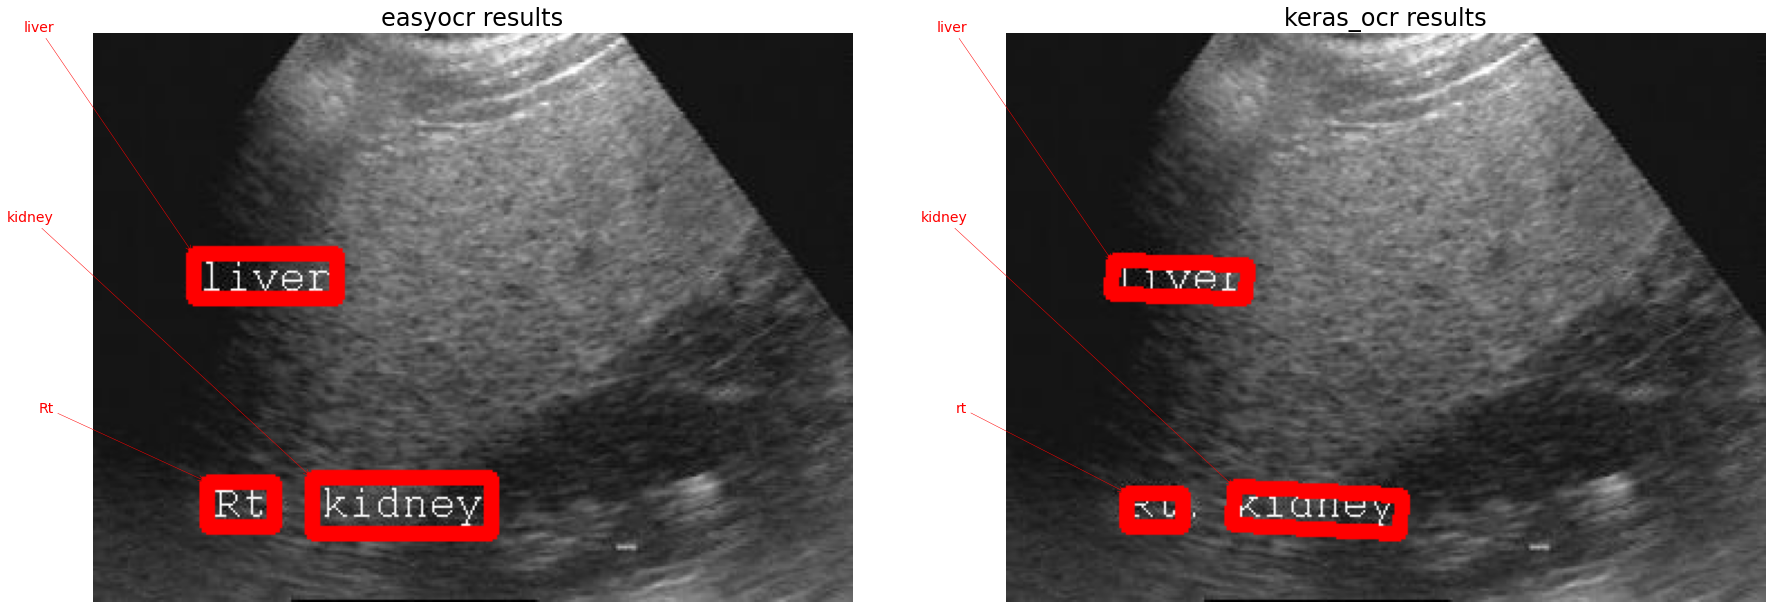

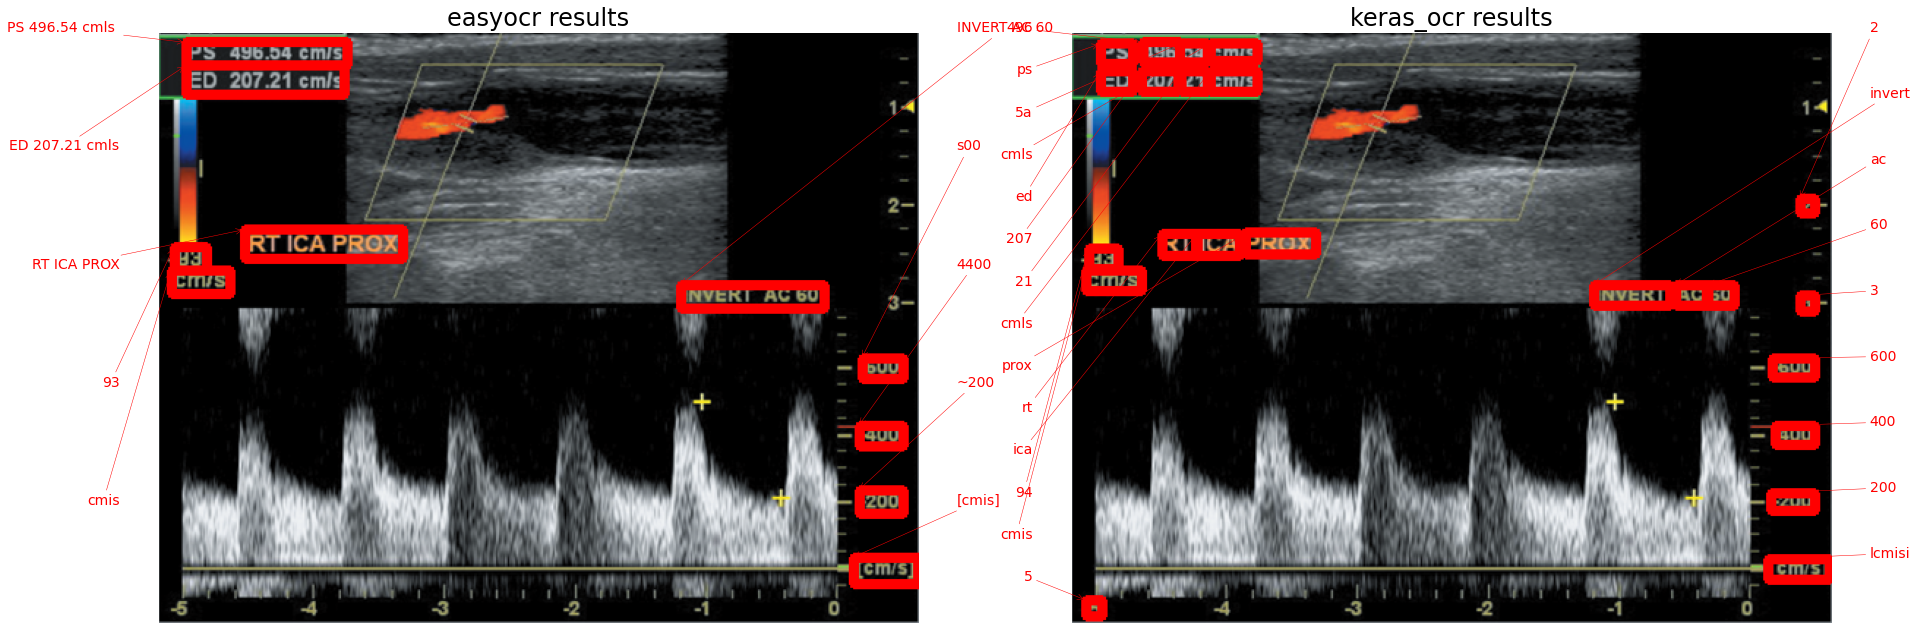

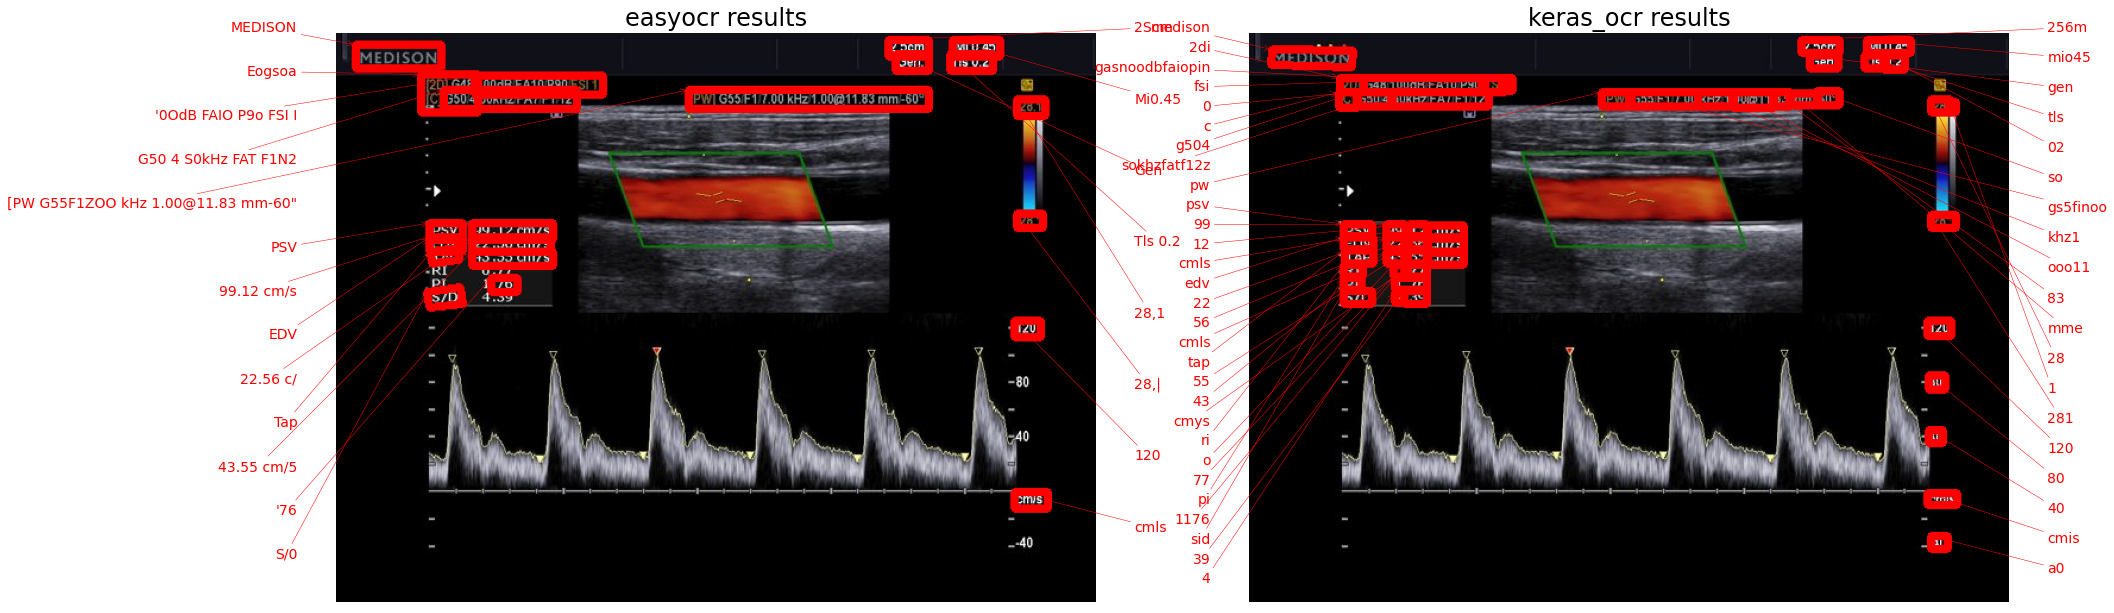

In [21]:
for img_fn in img_fns_test[:]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)